# Advanced Deep Learning for NLP - Text based adventure game RL


WIP: Links not assigned yet

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/agents/blob/master/docs/tutorials/1_dqn_tutorial.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/agents/blob/master/docs/tutorials/1_dqn_tutorial.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
</table>

## Google Colab stuff

In [1]:
%%capture
!pip install tf-agents
!pip install textworld
!pip install -q -U tensorflow-text
!pip install tensorflow-text

from google.colab import drive
drive.mount("/content/drive")
import os
os.chdir("/content/drive/MyDrive/DeepLearningNLP/")

Or alternatively (for future, when project not private anymore):

In [8]:
!git clone https://github.com/

Cloning into 'github.com'...
fatal: repository 'https://github.com/' not found


## Imports

In [4]:
from resources import DEFAULT_PATHS
# from tests import test_environment_creation

from tf_train_loop import TWTrainer

%load_ext autoreload
%autoreload 2

## Generate games


Generate simple debug game and large dataset of train and eval games.

In [ ]:
os.chdir("/content/drive/MyDrive/DeepLearningNLP/scripts/")

Will create single debug game. This is necessary.

In [ ]:
%%shell
bash ./make_debug_game.sh

Global seed: 2021
Game generated: /content/drive/My Drive/DeepLearningNLP/resources/game_th_lvl2_simple.ulx


Only run this if necessary. Depending on system will take hours.

In [ ]:
%%capture
%%shell
bash ./make_allgames.sh

In [ ]:
os.chdir("/content/drive/MyDrive/DeepLearningNLP/")

# Test environment

In [10]:
#test_environment_creation()

NameError: name 'test_environment_creation' is not defined

# Train

Set rewards for training.

In [6]:
REWARD_DICT = {
    "win_lose_value": 100,
    "max_loop_pun": 0,
    "change_reward": 1,
    "useless_act_pun": 1,
    "verb_in_adm": 1,
}

Try overfitting on one debug game (correct command "take x" will immediately win or lose the game).
Depending on whether random agent finds correct WIN command, number of iterations will be enough or not.


log can be found in/home/florian/Documents/DeepLearningNLP/resources/logdir/20210804-145945
Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))


Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))


step = 25: loss = 8.28e+01, Buff-len = 104
step = 25: Average Return = 51.0
step = 50: loss = 1.99e+02, Buff-len = 187
step = 50: Average Return = 51.0
step = 75: loss = 4.08e+02, Buff-len = 258
step = 75: Average Return = 50.0
step = 100: loss = 1.21e+03, Buff-len = 306
step = 100: Average Return = 51.0
step = 125: loss = 4.60e+03, Buff-len = 379
step = 125: Average Return = 51.0
step = 150: loss = 1.17e+04, Buff-len = 445
step = 150: Average Return = 51.0
step = 175: loss = 6.57e+03, Buff-len = 507
step = 175: Average Return = 50.0
step = 200: loss = 1.93e+04, Buff-len = 569
step = 200: Average Return = 50.0
step = 225: loss = 1.03e+04, Buff-len = 647
step = 225: Average Return = 51.0
step = 250: loss = 2.22e+04, Buff-len = 718
step = 250: Average Return = 50.0
step = 275: loss = 3.23e+04, Buff-len = 786
step = 275: Average Return = 51.0
step = 300: loss = 3.39e+04, Buff-len = 858
step = 300: Average Return = 51.0
step = 325: loss = 1.00e+05, Buff-len = 926
step = 325: Average Return

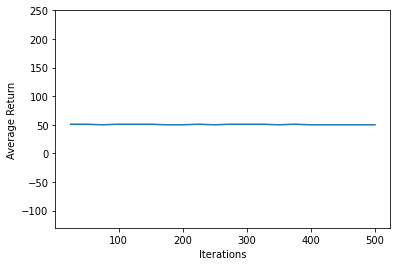

In [4]:
DEFAULT_HP = {
    "learning_rate": 1e-3,
    "initial_collect_steps": 2000,
    "collect_steps_per_iteration": 1,
    "replay_buffer_max_length": 100000,
    # large values lead to OOM with bert policy
    "batch_size": 32,
    "num_eval_episodes": 1,
    "game_gen_buffer": 25,
    "num_eval_games": 5,
}
trainer = TWTrainer(
    reward_dict=REWARD_DICT,
    hpar=DEFAULT_HP,
    debug=False,
    biased_buffer=True,
    # embedding into fc is default policy
    # agent_label="FCPolicy",
    agent_label="BertPolicy",
)
eval_scores = trainer.train(
    num_iterations=500,
    log_interval=25,
    eval_interval=25,
    game_gen_interval=500,
    plot_avg_ret=True,
)

Activate TensorBoard logging.

In [ ]:
pathdir = DEFAULT_PATHS["path_logdir"]
%load_ext tensorboard
%tensorboard --logdir $pathdir

Train on all four levels with (simple) Embedding-FC policy agent

In [4]:
DEFAULT_HP = {
    "learning_rate": 1e-3,
    "initial_collect_steps": 10000,
    "collect_steps_per_iteration": 1,
    "replay_buffer_max_length": 100000,
    "batch_size": 128,
    "num_eval_episodes": 1,
    "game_gen_buffer": 25,
    "num_eval_games": 10,
}

trainer = TWTrainer(
    env_dir="train_games_lvl1",
    reward_dict=REWARD_DICT,
    hpar=DEFAULT_HP,
    debug=False,
    biased_buffer=True,
    # embedding into fc is default policy
    agent_label="FCPolicy",
    # agent_label="BertPolicy",
)

NameError: name 'TWTrainer' is not defined

In [3]:
print(f"Starting with lvl: 1 \n")

eval_scores = trainer.train(
    num_iterations=3000,
    log_interval=250,
    eval_interval=500,
    game_gen_interval=500,
    rndm_fill_replay=True,
    plot_avg_ret=True,
)

print(f"Changing to next lvl: 2 \n")

trainer.change_env_dir(f"train_games_lvl2")
eval_scores = trainer.train(
    num_iterations=3000,
    log_interval=250,
    eval_interval=500,
    game_gen_interval=500,
    continue_training=True,
    rndm_fill_replay=True,
    plot_avg_ret=True,
)

print(f"Changing to next lvl: 3 \n")

trainer.change_env_dir(f"train_games_lvl3")
eval_scores = trainer.train(
    num_iterations=4000,
    log_interval=250,
    eval_interval=500,
    game_gen_interval=500,
    continue_training=True,
    rndm_fill_replay=True,
    plot_avg_ret=True,
)

print(f"Changing to next lvl: 4 \n")

trainer.change_env_dir(f"train_games_lvl4")
eval_scores = trainer.train(
    num_iterations=8000,
    log_interval=250,
    eval_interval=500,
    game_gen_interval=500,
    continue_training=True,
    rndm_fill_replay=True,
    plot_avg_ret=True,
)


Starting with lvl: 1 



NameError: name 'trainer' is not defined

## Hyper parameter search

Simple hyper parameter search.

CODE OUT OF DATE. Still used old train method.

In [ ]:
%%capture
!pip install optuna
import optuna

In [ ]:
def objective(trial):
    """"""

    hp_dict = {
      "num_iterations": 2000,
      "learning_rate": trial.suggest_loguniform("lr", 1e-4, 1e-2),
      "initial_collect_steps": 10000,
      "collect_steps_per_iteration": 1,
      "replay_buffer_max_length": 100000,
      "batch_size": trial.suggest_int("batch_size", 16, 256),
      "log_interval": 500,
      "num_eval_episodes": 1,
      "eval_interval": 100,
    }

    REWARD_DICT = {
        "win_lose_value": 100,
        "max_loop_pun": 1,
        "change_reward": 1,
        "useless_act_pun": 1,
        "verb_in_adm": 1,
    }

    eval_scores = train.main(plot_avg_ret=True, debug=False, reward_dict=REWARD_DICT, **hp_dict)
    # eval_scores = np.delete(eval_scores, 0)

    return max(eval_scores)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)
print(study.best_trial)

In [ ]:
print(study.best_trial)

FrozenTrial(number=0, values=[203.0], datetime_start=datetime.datetime(2021, 7, 30, 11, 46, 26, 924586), datetime_complete=datetime.datetime(2021, 7, 30, 11, 50, 2, 140224), params={'lr': 0.004015582546958087, 'batch_size': 89}, distributions={'lr': LogUniformDistribution(high=0.01, low=0.0001), 'batch_size': IntUniformDistribution(high=256, low=16, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=0, state=TrialState.COMPLETE, value=None)
